In [23]:
import json
import os
import pandas as pd
from pandas.io.json import json_normalize
import nltk
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# util methods
def load_json(json_path, artists=[]):
    if (os.path.isfile(json_path)):
        print("json")
        with open(json_path) as f:
            song_data = json.load(f)
            return song_data['songs']
        
    elif (os.path.isdir(json_path)):
        data = []
        json_files = []
        if (len(artists) > 0):
            for artist in artists:
                json_files = json_files + [json_file for json_file in os.listdir(json_path) if ((json_file.endswith('.json')) & (artist in json_file))]
        else:
            json_files = [json_file for json_file in os.listdir(json_path) if json_file.endswith('.json')]

        for json_file in json_files:
            path_to_json = os.path.join(json_path, json_file)
            with open(path_to_json) as f:
                song_data = json.load(f)
                data = data + song_data['songs']
        
        return data
    
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [125]:
json_path = '../data/deutsch'
artists = ['Bushido']

data = load_json(json_path, artists)
df = json_normalize(data)
print(len(df))
lyrics = "".join(df.lyrics.values)

100


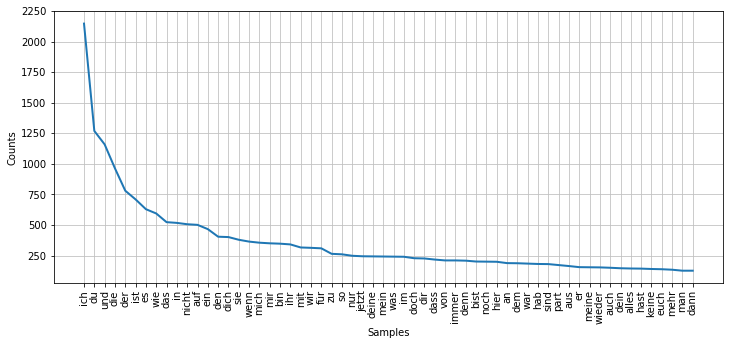

In [145]:
#nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('german')
lyrics = lyrics.replace('\n', ' ').lower()
words = re.findall('\'?\w+-?\'?\w+? ', lyrics)
words = [word.strip() for word in words]

words_filtered = []
for word in words:
    #if word not in stop_words:
        words_filtered.append(word)
plt.figure(figsize=(12,5))
fd = nltk.FreqDist(words_filtered)
fd.plot(60)

In [144]:
stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 '

In [143]:
words

['es',
 'wird',
 'langsam',
 'mich',
 'zu',
 'der',
 'scheiße',
 'hier',
 'zu',
 'äußern',
 'die',
 'die',
 'du',
 'über',
 'mich',
 'in',
 'ganz',
 'deutschland',
 'früher',
 'war',
 'es',
 'fick',
 'die',
 'oder',
 'louis',
 'heute',
 'sind',
 'es',
 'lka-beamte',
 'und',
 'security',
 'wie',
 'es',
 'heute',
 'war',
 'nicht',
 'unser',
 'ehrlich',
 'welcher',
 'sklave',
 'macht',
 'über',
 'hundert',
 'mille',
 'kenneth',
 'sitzt',
 'bei',
 'stern',
 'tv',
 'und',
 'um',
 "sein'n",
 'ruf',
 'zu',
 'retten',
 'doch',
 'du',
 'würdest',
 'eigentlich',
 'so',
 'gern',
 'in',
 "mein'n",
 'schuhen',
 'stecken',
 'du',
 'bist',
 'vogelfrei',
 'weil',
 'du',
 'den',
 'ehrenkodex',
 'brichst',
 'du',
 'bist',
 'nicht',
 "int'ressant",
 'für',
 'diese',
 'medien',
 'ohne',
 'mich',
 'ich',
 'bin',
 'angeblich',
 'sklave',
 'der',
 'familie',
 'abou-chaker',
 'schäm',
 'dich',
 'arafat',
 'war',
 'sowas',
 'wie',
 'dein',
 'vater',
 'du',
 'hast',
 'dank',
 'uns',
 'gelebt',
 'so',
 'wie',
 '

In [141]:
lyrics

'[intro] es wird langsam zeit, mich zu der scheiße hier zu äußern die lügen, die du über mich verbreitest, in ganz deutschland früher war es „fick die polizei“ oder louis v heute sind es lka-beamte und security wie es heute ist, war nicht unser wille, ehrlich welcher sklave macht über hundert mille jährlich? kenneth sitzt bei stern tv und lügt, um sein\'n ruf zu retten doch du würdest eigentlich so gern in mein\'n schuhen stecken du bist vogelfrei weil du den ehrenkodex brichst du bist nicht int\'ressant für diese medien ohne mich ich bin angeblich sklave der familie abou-chaker schäm dich – arafat war sowas wie dein vater du hast dank uns gelebt so wie ein könig in berlin ein vermögen hier verdient, plötzlich hör\' ich, dass du fliehst du hast vergessen, wo du herkommst, das geld raubt dir die sinne aber kein problem, ich helf\' dir auf die sprünge, kay!  [part 1] ich erzähl\'s dir nochmal, warte kurz ich fang\' an nach der trennung deiner nabelschnur irgendwo in ravensburg für dich i

In [51]:
stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 '

[nltk_data] Downloading package stopwords to /Users/hao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [15]:
freq_dist = nltk.FreqDist(df.iloc[0].lyrics)
freq_dist

FreqDist({' ': 1656, 'e': 1129, 'n': 714, 'i': 693, 'a': 564, 't': 547, 'r': 543, 's': 494, 'h': 477, 'd': 436, ...})

In [16]:
freq_dist.keys()

dict_keys(['[', 'I', 'n', 't', 'r', 'o', ']', '\n', 'E', 's', ' ', 'w', 'i', 'd', 'l', 'a', 'g', 'm', 'Z', 'e', ',', 'c', 'h', 'z', 'u', 'S', 'ß', 'ä', 'D', 'L', 'ü', 'b', 'v', 'F', '„', 'k', 'P', '“', 'V', 'H', 'K', 'A', '-', 'B', 'y', 'W', 'M', 'j', '?', 'T', "'", 'R', 'f', 'x', 'C', '–', 'ö', 'p', 'G', '!', '1', 'N', 'Ü', 'J', 'U', 'O', 'é', ':', '.', 'Ö', 'Y', '2', 'Q', '3', '0', '8'])

1980es Rap


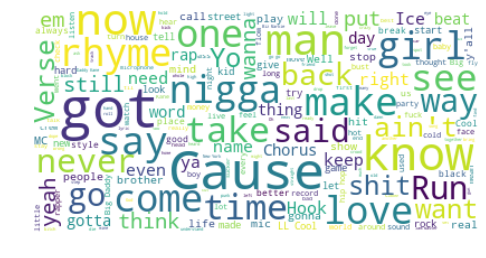

In [162]:
artists_80es = [
    'Run-D.M.C.',
    'Beastie Boys',
    'LL Cool J',
    'Big Daddy Kane',
    'Ice T',
    'Rakim',
    'Biz Markie'
]
print('1980es Rap')
data = load_json('../data/', artists_80es)
df = json_normalize(data)
lyrics = " ".join(df.lyrics.values)
plot_word_cloud(clean_text(lyrics))

1990s Rap


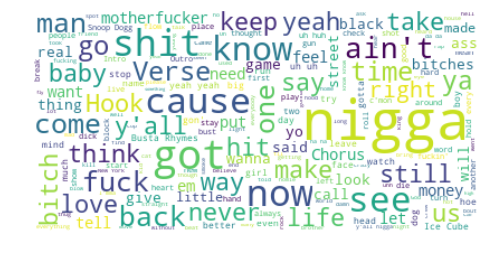

In [163]:
artists_90es = [
    '2Pac',
    'The Notorious B.I.G.',
    'Busta Rhymes',
    'Snoop Dogg',
    'DMX',
    'Outkast',
    'Puff Daddy',
    'Ice Cube',
    'Jay Z',
    'Nas'
]
print("1990s Rap")
data = load_json('../data/', artists_90es)
df = json_normalize(data)
lyrics = " ".join(df.lyrics.values)
plot_word_cloud(clean_text(lyrics))

2000s Rap


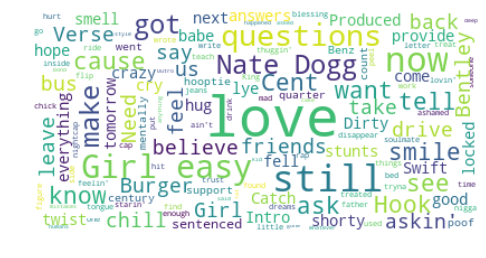

In [164]:
artists_00s = [
    '50 Cent',
    'Nelly',
    'Lil Wayne',
    'Missy Elliot',
    'T.I.',
    'Eminem',
    'Ludacris',
    'Xzibit',
    'The Game',
    'Kanye West'
]
print("2000s Rap")
data = load_json('../data/', artists_00s)
df = json_normalize(data)
lyrics = " ".join(df.lyrics.values)
plot_word_cloud(clean_text(df.lyrics.values[0]))

In [35]:
df.artist.unique()

array(['2Pac'], dtype=object)

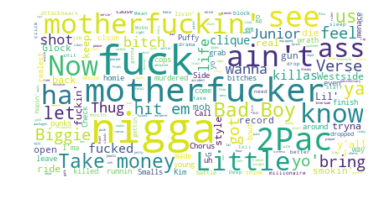

In [36]:
plot_word_cloud(clean_text(df.lyrics.values[0]))

In [13]:
def clean_text(text):
    return text.replace('\n', ' ')

In [14]:
def load_lyrics(target):
    lyrics = ''
    if(os.path.isfile(target)):
        with open(target) as f:
            data = json.load(f)
            for song in data['songs']:
                lyrics = lyrics + ' ' + song['lyrics']    

In [15]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [106]:
def load_json(json_path, artists=[]):
    if (os.path.isfile(json_path)):
        print("json")
        with open(json_path) as f:
            song_data = json.load(f)
            return song_data['songs']
        
    elif (os.path.isdir(json_path)):
        data = []
        json_files = []
        if (len(artists) > 0):
            for artist in artists:
                json_files = json_files + [json_file for json_file in os.listdir(json_path) if ((json_file.endswith('.json')) & (artist in json_file))]
        else:
            json_files = [json_file for json_file in os.listdir(json_path) if json_file.endswith('.json')]

        for json_file in json_files:
            path_to_json = os.path.join(json_path, json_file)
            with open(path_to_json) as f:
                song_data = json.load(f)
                data = data + song_data['songs']
        
        return data

In [111]:
datas = load_json("../data/test", artists=["50 Cent", "2Pac"])

In [112]:
json_normalize(datas)

,album,artist,image,lyrics,raw.album,raw.album.api_path,raw.album.artist.api_path,raw.album.artist.header_image_url,raw.album.artist.id,raw.album.artist.image_url,...,raw.stats.verified_annotations,raw.title,raw.title_with_featured,raw.url,raw.verified_annotations_by,raw.verified_contributors,raw.verified_lyrics_by,raw.writer_artists,title,year
0,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/1a10bcefe2e4c82bd02b...,[Produced by Dirty Swift]\n\n[Intro: 50 Cent]\...,NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,21 Questions,21 Questions (Ft. Nate Dogg),https://genius.com/50-cent-21-questions-lyrics,[],[],[],"[{'api_path': '/artists/411837', 'header_image...",21 Questions,2003-04-29
1,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/3389143a3e12456fc07d...,[Produced by Dr. Dre & Mike Elizondo]\n\n[Intr...,NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,1,In Da Club,In Da Club,https://genius.com/50-cent-in-da-club-lyrics,"[{'api_path': '/users/1628085', 'avatar': {'ti...","[{'contributions': ['annotations'], 'artist': ...",[],"[{'api_path': '/artists/108', 'header_image_ur...",In Da Club,2003-01-07
2,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/17bdb55979efe915f90e...,"[Produced by Darrell ""Digga"" Branch, Eminem & ...",NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,Many Men (Wish Death),Many Men (Wish Death),https://genius.com/50-cent-many-men-wish-death...,[],[],[],"[{'api_path': '/artists/33782', 'header_image_...",Many Men (Wish Death),2003-05-06
3,Street King Immortal,50 Cent,https://images.genius.com/4dbad662e44b87d87010...,[Produced by S1]\n\n[Hook: Adam Levine]\nMy li...,NaN,/albums/129063,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,My Life,My Life (Ft. Adam Levine & Eminem),https://genius.com/50-cent-my-life-lyrics,[],[],[],"[{'api_path': '/artists/27446', 'header_image_...",My Life,2012-11-26
4,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/17bdb55979efe915f90e...,"[Intro: 50 Cent]\nHey Em, you know you're my f...",NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,Patiently Waiting,Patiently Waiting (Ft. Eminem),https://genius.com/50-cent-patiently-waiting-l...,[],[],[],"[{'api_path': '/artists/34793', 'header_image_...",Patiently Waiting,2003-02-06
5,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/2a2618322acb97f3f553...,[Produced by Mr. Porter]\n\n[Hook]\nI don't kn...,NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,P.I.M.P.,P.I.M.P.,https://genius.com/50-cent-pimp-lyrics,[],[],[],"[{'api_path': '/artists/509', 'header_image_ur...",P.I.M.P.,2003-08-12
6,Back To The Street 2,50 Cent,https://images.genius.com/75c39cc8eae85507e7a0...,"[Intro: 50 Cent]\nYeah, uh-huh\nThey don't do ...",NaN,/albums/124665,/artists/2035,https://images.genius.com/26db07f1ab289c5c8f33...,2035.0,https://images.genius.com/26db07f1ab289c5c8f33...,...,1,We Up,We Up (Ft. Kendrick Lamar & Kidd Kidd),https://genius.com/50-cent-we-up-lyrics,"[{'api_path': '/users/131117', 'avatar': {'tin...","[{'contributions': ['annotations'], 'artist': ...",[],"[{'api_path': '/artists/13585', 'header_image_...",We Up,2013-01-01
7,The Kanan Tape,50 Cent,https://images.genius.com/ba09eef1371d0972cfb1...,[Produced by Sonny Digital]\n\n[Verse 1: 50 Ce...,NaN,/albums/137591,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,I'm the Man,I'm the Man (Ft. Sonny Digital),https://genius.com/50-cent-im-the-man-lyrics,[]

In [91]:
datas[datas.artist == "50 Cent"]

AttributeError: 'list' object has no attribute 'artist'

In [5]:
with open('../data/2Pac_lyrics.json') as f:
    data = json.load(f)

In [10]:
for i in data:
    print(i

songs
artist


In [20]:
data["songs"][0]["lyrics"]

"[Intro: 2Pac]\nI ain't got no motherfuckin' friends\nThat's why I fucked yo' bitch, you fat motherfucker!\n(Take money) West Side, Bad Boy killas\n(Take money) You know who the realest is\n(Take money) We bring it too\n(Take money)\n\n[Verse 1: 2Pac]\nFirst off, fuck yo' bitch and the clique you claim\nWestside when we ride, come equipped with game\nYou claim to be a player, but I fucked your wife\nWe bust on Bad Boys, niggas fucked for life\nPlus, Puffy tryna see me, weak hearts I rip\nBiggie Smalls and Junior M.A.F.I.A. is some mark-ass bitches\nWe keep on comin' while we runnin' for your jewels\nSteady gunnin', keep on bustin' at them fools, you know the rules\nLil' Caesar, go ask your homie how I'll leave ya\nCut your young-ass up, leave you in pieces, now be deceased\nLil' Kim, don't fuck around with real G's\nQuick to snatch yo' ugly ass off the streets, so fuck peace!\nI'll let them niggas know it's on for life\nDon't let the Westside ride tonight (ha ha ha)\nBad Boy murdered o

In [22]:
len(data["songs"])

100

In [23]:
T = "ABC"

In [24]:
T + T

'ABCABC'

In [94]:
"abc".contains(["a"])

AttributeError: 'str' object has no attribute 'contains'

In [97]:
["a"] in "abx"

TypeError: 'in <string>' requires string as left operand, not list